## Ampere Demo Notebook!

This notebook will walk you through using Ampere, and show a few different use cases where the model can be used to fit experimental data.

In order to begin, we will need to parametrize the model and select a model. This was done below with the line: 

```python
from ampere import SingleParticle
```

by hitting shift-tab while attempting to parametrize the model, we can view the docstring, which will tell us how to use the models.

The model will start with reasonable defaults, but we can choose different defaults if we wish, by initializing a dictionary of all of the 


In [1]:
available_parameters = ['Dp','Dn','cspmax','csnmax','lp','ln','Rp','Rn','T','ce','ap','an','M_sei','rho_sei','Kappa_sei','kp','kn','ksei','N1','N2']
default_values = [1e-14, 1e-14, 51555.0, 30555.0, 8e-05, 8.8e-05, 2e-06, 2e-06, 303.15, 1000.0, 885000.0, 723600.0, 0.026, 2100.0, 1.0, 2.334e-11, 8.307e-12, 1.5e-06, 30, 30]
print(dict(zip(available_parameters, default_values)))

{'Dp': 1e-14, 'Dn': 1e-14, 'cspmax': 51555.0, 'csnmax': 30555.0, 'lp': 8e-05, 'ln': 8.8e-05, 'Rp': 2e-06, 'Rn': 2e-06, 'T': 303.15, 'ce': 1000.0, 'ap': 885000.0, 'an': 723600.0, 'M_sei': 0.026, 'rho_sei': 2100.0, 'Kappa_sei': 1.0, 'kp': 2.334e-11, 'kn': 8.307e-12, 'ksei': 1.5e-06, 'N1': 30, 'N2': 30}


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ampere import SingleParticleParabolic, SingleParticleFDSEI, SingleParticleFD

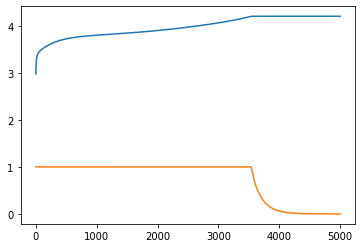

In [3]:
spm1 = SingleParticleFDSEI()
trial = spm1.charge(current=1.0)

plt.plot(trial.time, trial.voltage)
plt.plot(trial.time, trial.current)

### This notebook explores the Single Particle Model (SPM)

The SPM examines various physical phenomena, including:
* Solid phase diffusion in the spherical particles, as given by Fick's law:

$\frac{\partial c_{s}}{\partial t} = \frac{D_s}{r^2}\frac{\partial}{\partial r}(r^2 \frac{\partial c}{\partial r})$


* Reaction kinetics, as described by Butler-Volmer:

$x_{surf} = \frac{c_{surf}}{c_max} $

$j = kc_{s,max}c^{0.5}_{e}(1-x_{surf})^{0.5}x_{surf}^{0.5}[exp(\frac{0.5 F}{RT}\eta)-exp(-\frac{0.5 F}{RT}\eta)]$

* Solid-phase potential, as dictated by the surface concentration at the particles

$\eta = \phi(x_{surf})-U$

* The available parameters are as follows:

| name   | description                                 | default value | Units   |
|--------|---------------------------------------------|---------------|---------|
| Dn     | Li+ Diffusivity in negative particle        | 3.9e-14       | m^2/s  |
| Dp     | Li+ Diffusivity in positive particle        | 1e-14         | m^2/s  |
| Rn     | Negative particle radius                    | 2e-6          | m       |
| Rp     | Positive particle radius                    | 2e-6          | m       |
| T      | Ambient Temperature                         | 303.15        | K       |
| an     | Surface area per unit volume of negative electrode          | 723600        |   m^2/m^3      |
| ap     | Surface area per unit volume of positive electrode          | 885000        |    m^2/m^3     |
| ce     | Starting electrolyte Li+ concentration      | 1000          | mol/m^3 |
| csnmax | Maximum Li+ concentration of negative solid | 30555         | mol/m^3 |
| cspmax | Maximum Li+ concentration of positive solid | 51555         | mol/m^3 |
| kn     | Negative electrode reaction rate            | 5.0307e-9     | m^4/mol s        |
| kp     | Positive electrode reaction rate            | 2.334e-9      |   m^4/mol s      |
| ln     | Negative electrode thickness                | 88e-6         | m       |
| lp     | Positive electrode thickness                | 80e-6         | m       |


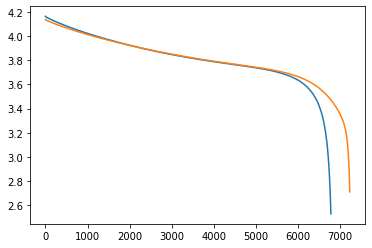

In [4]:
parameters = {
    'Dn': 3.9e-14,
    'Dp': 1e-14,
    'Rn': 2e-06,
    'Rp': 2e-06,
    'T': 303.15,
    'an': 723600,
    'ap': 885000,
    'ce': 1000,
    'csnmax': 30555,
    'cspmax': 51555,
    'kn': 5.0307e-09,
    'kp': 2.334e-09,
    'ln': 8.8e-05,
    'lp': 7e-05
}
spm1 = SingleParticleFD(initial_parameters=parameters)
spm2 = SingleParticleFD() # default parameters

trial = spm1.discharge(internal=True, trim=True)
trial2 = spm2.discharge(internal=True, trim=True)
plt.plot(trial.time, trial.voltage)
plt.plot(trial2.time, trial2.voltage)

Text(0.5, 1.0, 'Concentration across the positive particle sampled every ~100 seconds')

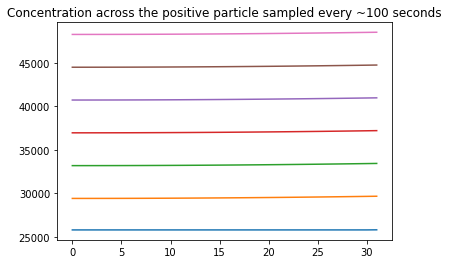

In [5]:
positive_concentration_indices = spm1.internal_structure['positive_concentration']
time_indices = spm1.internal_structure['time']
positive_concentration = trial.internal[::100, positive_concentration_indices].T
plt.plot(positive_concentration)
plt.title('Concentration across the positive particle sampled every ~100 seconds')

Although this model is relatively complex, it is still performant because the Sundials solver is so efficient.

In [6]:
%%timeit
a = spm1.discharge(current=10)

7.9 ms ± 155 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Traditional fitting approach:
* acquire experimental data
* select model
* solve model 
* select optimizer
* interface model and optimizer
* repeatedly call until the fits look about right
* put into plotting software
* optional analysis: confidence intervals, fitting only select parameters

Estimating the following parameters:
Rp
lp
{'Dp': 1e-14, 'Dn': 1e-14, 'cspmax': 51555, 'csnmax': 30555, 'lp': 8e-05, 'ln': 8.8e-05, 'Rp': 2e-06, 'Rn': 2e-06, 'T': 303.15, 'ce': 1000, 'ap': 885000, 'an': 723600, 'kp': 2.334e-11, 'kn': 8.307e-12, 'N1': 30, 'N2': 30}
{'Dp': 1e-14, 'Dn': 1e-14, 'cspmax': 51555, 'csnmax': 30555, 'lp': 8.5e-05, 'ln': 8.8e-05, 'Rp': 1.5e-06, 'Rn': 2e-06, 'T': 303.15, 'ce': 1000, 'ap': 885000, 'an': 723600, 'kp': 2.334e-11, 'kn': 8.307e-12, 'N1': 30, 'N2': 30}


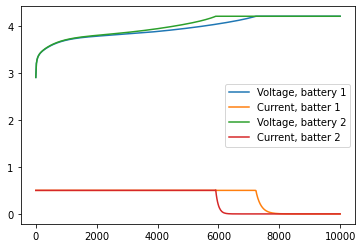

In [36]:
# generate experimental data with some set of parameters

labels = ['Rp','lp']
values = [1.5e-6, 85e-6]
p1 = dict(zip(labels, values))
# print(p1)

bounds = [[1e-7,1e-5],[1e-7,1e-5]]
spm1 = SingleParticleFD() # default parameters
spm2 = SingleParticleFD(initial_parameters=p1, estimate_parameters=['Rp','lp'])
print(spm1.initial_parameters)
print(spm2.initial_parameters)

# create the experimental data
data = spm1.charge(current=0.5)
data2 = spm2.charge(current=0.5)
t_exp = data.time
v_exp = data.voltage
curr_exp = data.current

plt.plot(t_exp, v_exp, label='Voltage, battery 1')
plt.plot(t_exp, curr_exp, label='Current, batter 1')
plt.plot(data2.time, data2.voltage, label='Voltage, battery 2')
plt.plot(data2.time, data2.current, label='Current, batter 2')

plt.legend()

In [8]:
spm2.fit([t_exp], [v_exp], currents=[-0.5], bounds=bounds, method='Nelder-Mead', maxiter=100, tol=1e-7)

[4, 6]
[8.5e-05 1.5e-06]


c:\users\neal\miniconda3\envs\keras\lib\site-packages\scipy\optimize\_minimize.py:534: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


 final_simplex: (array([[8.00041053e-05, 1.99989710e-06],
       [7.99982765e-05, 2.00004169e-06],
       [8.00005458e-05, 1.99998866e-06]]), array([2.99491928e-07, 3.28679825e-07, 3.83939622e-07]))
           fun: 2.9949192778737297e-07
       message: 'Optimization terminated successfully.'
          nfev: 143
           nit: 76
        status: 0
       success: True
             x: array([8.00041053e-05, 1.99989710e-06])

In [9]:
true_values = spm1.initial[spm2.estimate_indices]
error = (spm2.fitted_parameters-true_values)/true_values*100
print("Percent error for the estimated parameters:")
print(dict(zip(spm2.estimate_parameters, error)))

Percent error for the estimated parameters:
{'Rp': 0.005131680972645285, 'lp': -0.005144881060466958}


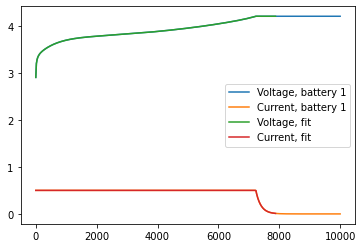

In [10]:
fit_data = spm2.charge(current=0.5, trim=True)
plt.plot(t_exp, v_exp, label='Voltage, battery 1')
plt.plot(t_exp, curr_exp, label='Current, battery 1')
plt.plot(fit_data.time, fit_data.voltage, label='Voltage, fit')
plt.plot(fit_data.time, fit_data.current, label='Current, fit')

plt.legend()

### What about fitting 2 simultaneous currents?

Estimating the following parameters:
Rp
lp


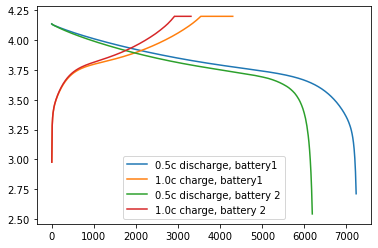

In [11]:
a = [
    spm1.discharge(current=0.5, trim=True),
    spm1.charge(current=1.0, trim=True)
]

# re-initialize battery 2 in order to reset the initial guess
spm2 = SingleParticleFD(initial_parameters=p1, estimate_parameters=['Rp','lp'])
b = [
    spm2.discharge(current=0.5, trim=True),
    spm2.charge(current=1.0, trim=True)
]

t_exp = [a[0].time, a[1].time]
v_exp = [a[0].voltage, a[1].voltage]
plt.plot(t_exp[0], v_exp[0], label='0.5c discharge, battery1')
plt.plot(t_exp[1], v_exp[1], label = '1.0c charge, battery1')
plt.plot(b[0].time, b[0].voltage, label='0.5c discharge, battery 2')
plt.plot(b[1].time, b[1].voltage, label='1.0c charge, battery 2')
plt.legend()

In [12]:
spm2.fit(t_exp, v_exp, currents=[0.5,-1.0], maxiter=1000)

[4, 6]
[8.5e-05 1.5e-06]


 final_simplex: (array([[8.08667161e-05, 1.97729878e-06],
       [8.19068873e-05, 1.95248270e-06],
       [8.15906790e-05, 1.95942818e-06]]), array([0.00031252, 0.00034453, 0.00038968]))
           fun: 0.00031252041400071863
       message: 'Optimization terminated successfully.'
          nfev: 56
           nit: 30
        status: 0
       success: True
             x: array([8.08667161e-05, 1.97729878e-06])

In [13]:
true_values = spm1.initial[spm2.estimate_indices]
error = (spm2.fitted_parameters-true_values)/true_values*100
print("Percent error for the estimated parameters:")
print(dict(zip(spm2.estimate_parameters, error)))

Percent error for the estimated parameters:
{'Rp': 1.0833950713280007, 'lp': -1.135060936212447}


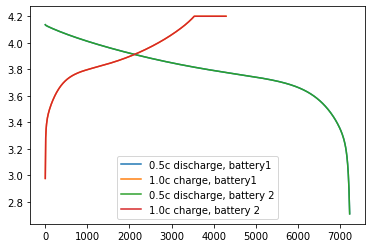

In [14]:
fit = [
    spm2.discharge(current=0.5, trim=True),
    spm2.charge(current=1.0, trim=True)
]
# print(a)

plt.plot(t_exp[0], v_exp[0], label='0.5c discharge, battery1')
plt.plot(t_exp[1], v_exp[1], label = '1.0c charge, battery1')
plt.plot(fit[0].time, fit[0].voltage, label='0.5c discharge, battery 2')
plt.plot(fit[1].time, fit[1].voltage, label='1.0c charge, battery 2')
plt.legend()

### What about cycling? Or arbitrary charge/discharge patterns?

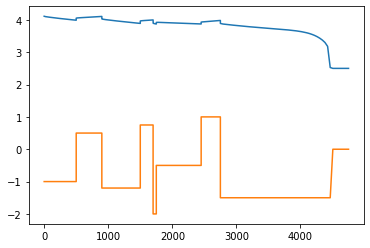

In [15]:
# this function takes a list of durations (in seconds) and currents (in amps)
times = [500,400,600,200,50,700,300,2000]
currents = [1.0,-0.5,1.2,-0.75,2.0,0.5,-1.0,1.5]
pwc = spm1.piecewise_current(times, currents)
t_exp = pwc.time
v_exp = pwc.voltage
plt.plot(pwc.time, pwc.voltage)
plt.plot(pwc.time, pwc.current)

In [16]:
spm2 = SingleParticleFD(initial_parameters=p1, estimate_parameters=['Rp','kp','lp'])
pwc = spm2.piecewise_current(times, currents)
t_initial = pwc[0]
v_initial = pwc[1]
spm2.fit(times, v_exp, currents=currents, currents_type='piecewise', tol=1e-8, maxiter=1000)


Estimating the following parameters:
Rp
kp
lp
[4, 6, 12]
[8.500e-05 1.500e-06 2.334e-11]


 final_simplex: (array([[7.99998586e-05, 2.00000351e-06, 2.33400893e-11],
       [8.00001334e-05, 1.99999661e-06, 2.33399127e-11],
       [8.00001814e-05, 1.99999531e-06, 2.33399005e-11],
       [7.99998995e-05, 2.00000253e-06, 2.33401058e-11]]), array([9.30046600e-09, 9.82343249e-09, 1.46597626e-08, 1.72597763e-08]))
           fun: 9.300465995002724e-09
       message: 'Optimization terminated successfully.'
          nfev: 267
           nit: 149
        status: 0
       success: True
             x: array([7.99998586e-05, 2.00000351e-06, 2.33400893e-11])

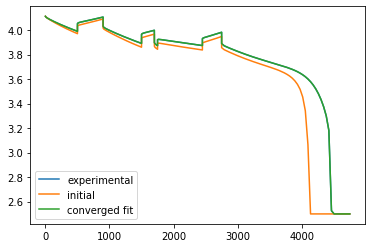

In [17]:
plt.plot(t_exp, v_exp, label='experimental')
plt.plot(t_initial, v_initial, label = 'initial')
pwc = spm2.piecewise_current([500,400,600,200,50,700,300,2000], [1.0,-0.5,1.2,-0.75,2.0,0.5,-1.0,1.5])
plt.plot(pwc[0], pwc[1], label='converged fit')
plt.legend()

In [18]:
true_values = spm1.initial[spm2.estimate_indices]
error = (spm2.fitted_parameters-true_values)/true_values*100
print("Percent error for the estimated parameters:")
print(dict(zip(spm2.estimate_parameters, error)))

Percent error for the estimated parameters:
{'Rp': -0.00017680060284788504, 'kp': 0.00017539652432834357, 'lp': 0.0003828046376945533}


## The P2D model works the same way

but has greater complexity and is more accurate

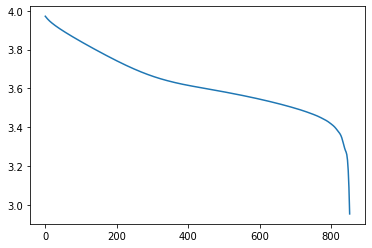

In [19]:
from ampere import PseudoTwoDimFD
import matplotlib.pyplot as plt
%matplotlib inline

p2d1 = PseudoTwoDimFD({'Nr1': 5, 'Nr2': 5})
data2 = p2d1.discharge(current=4.0, trim=True, internal=True)
plt.plot(data2.time, data2.voltage)

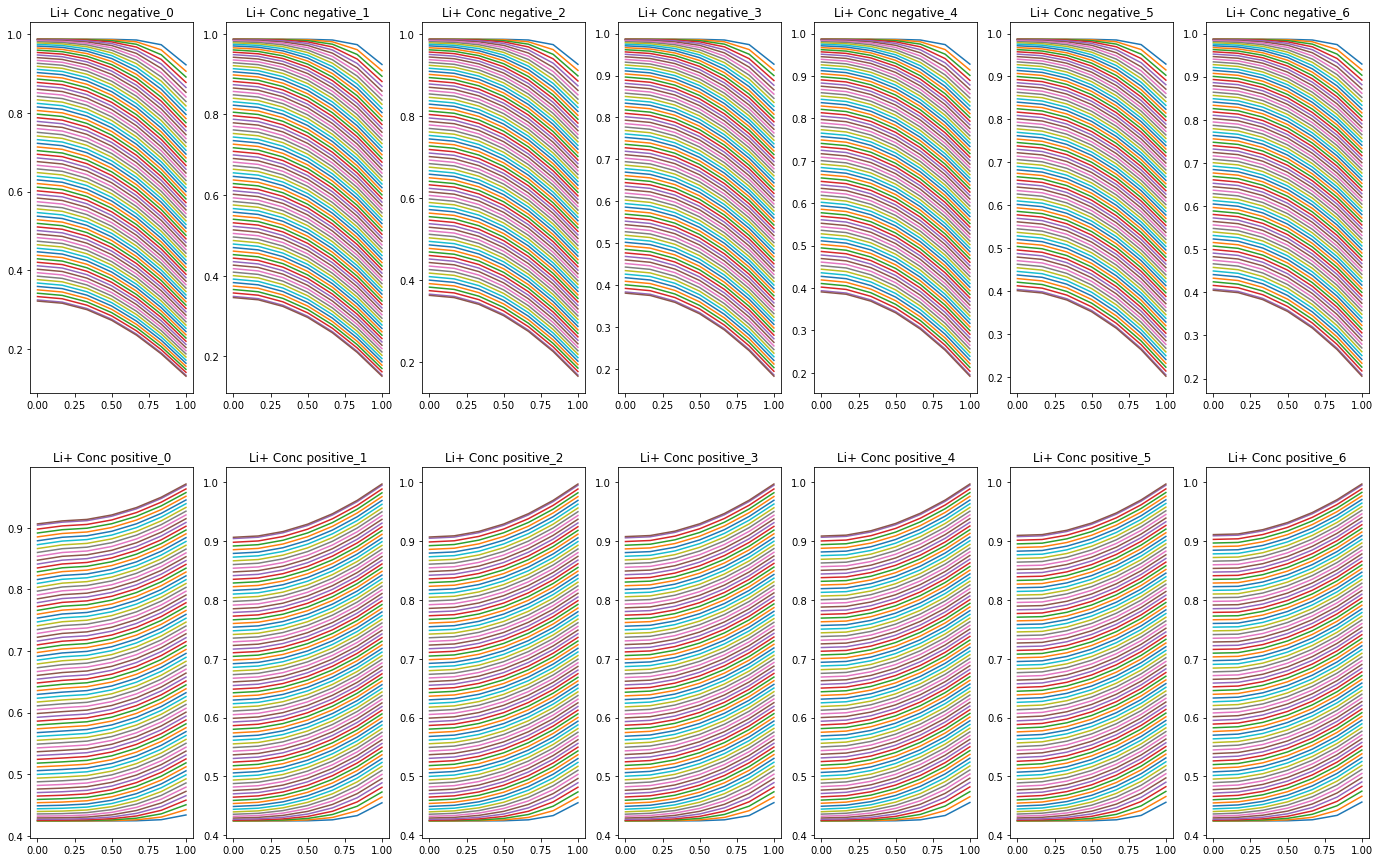

In [20]:
import numpy as np

# plot all of the internal states of the solid particles
# for the positive electrode, particle 0 is the closest to the current collector,
# and so experiences the least lithium interaction.
# for the negative electrode, particle 0 is the closest to the separator,
# and so experiences the most lithium interaction.
fig, axs = plt.subplots(2, 7)
fig.set_figheight(15)
fig.set_figwidth(24)
for key in p2d1.internal_structure['solid_lithium_concentration']:
    row = 0 if key.find('positive') else 1
    i = int(key.split('_')[-1])
    indices = p2d1.internal_structure['solid_lithium_concentration'][key]
    x = np.linspace(0,1,len(indices))
    axs[row, i].plot(x, data2.internal[1:, indices].T)
    axs[row, i].set_title(f'Li+ Conc {key}')

Estimating the following parameters:
Rp
lp
{'D1': 1.5e-09, 'Dsn': 7.2e-14, 'Dsp': 7.5e-14, 'Rn': 1e-05, 'Rp': 8e-06, 'T': 303.15, 'brugn': 1.5, 'brugp': 1.5, 'brugs': 1.5, 'c0': 1200, 'csnmax': 30555, 'cspmax': 45829, 'efn': 0.0326, 'efp': 0.025, 'en': 0.38, 'ep': 0.4, 'es': 0.45, 'kn': 1.0307e-10, 'kp': 1.334e-10, 'ln': 4.65e-05, 'lp': 4.3e-05, 'ls': 1.6e-05, 'sigma_n': 100, 'sigma_p': 10, 't1': 0.363, 'N1': 7, 'N2': 3, 'N3': 7, 'Nr1': 5, 'Nr2': 5}
{'D1': 1.5e-09, 'Dsn': 7.2e-14, 'Dsp': 7.5e-14, 'Rn': 1e-05, 'Rp': 1.5e-06, 'T': 303.15, 'brugn': 1.5, 'brugp': 1.5, 'brugs': 1.5, 'c0': 1200, 'csnmax': 30555, 'cspmax': 45829, 'efn': 0.0326, 'efp': 0.025, 'en': 0.38, 'ep': 0.4, 'es': 0.45, 'kn': 1.0307e-10, 'kp': 1.334e-10, 'ln': 4.65e-05, 'lp': 8.5e-05, 'ls': 1.6e-05, 'sigma_n': 100, 'sigma_p': 10, 't1': 0.363, 'N1': 7, 'N2': 3, 'N3': 7, 'Nr1': 3, 'Nr2': 3}


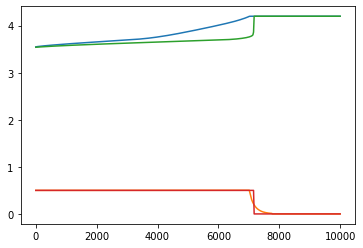

In [28]:
p2d2 = PseudoTwoDimFD(initial_parameters=p1, estimate_parameters=['Rp', 'lp'])
print(p2d1.initial_parameters)
print(p2d2.initial_parameters)

# create the experimental data
data = p2d1.charge(current=0.5)
data2 = p2d2.charge(current=0.5)
t_exp = data.time
v_exp = data.voltage
curr_exp = data.current

plt.plot(t_exp, v_exp, label='Voltage, battery 1')
plt.plot(t_exp, curr_exp, label='Current, batter 1')
plt.plot(data2.time, data2.voltage, label='Voltage, battery 2')
plt.plot(data2.time, data2.current, label='Current, batter 2')

In [29]:
p2d2.fit([t_exp], [v_exp], currents=[-0.5], bounds=bounds, method='Nelder-Mead', maxiter=100, tol=1e-7)

[4, 20]
[1.5e-06 8.5e-05]


c:\users\neal\miniconda3\envs\keras\lib\site-packages\scipy\optimize\_minimize.py:534: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


combination of parameters [2.109375e-06 4.887500e-05] failed
combination of parameters [1.89609375e-06 5.04687500e-05] failed
combination of parameters [2.01386719e-06 5.03359375e-05] failed


 final_simplex: (array([[7.82622294e-06, 4.30385064e-05],
       [7.81781860e-06, 4.30378430e-05],
       [7.80953345e-06, 4.30360316e-05]]), array([0.00016857, 0.00016861, 0.00016866]))
           fun: 0.00016857106226802877
       message: 'Optimization terminated successfully.'
          nfev: 129
           nit: 67
        status: 0
       success: True
             x: array([7.82622294e-06, 4.30385064e-05])

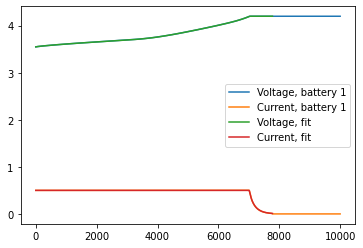

In [30]:
fit_data = p2d2.charge(current=0.5, trim=True)
plt.plot(t_exp, v_exp, label='Voltage, battery 1')
plt.plot(t_exp, curr_exp, label='Current, battery 1')
plt.plot(fit_data.time, fit_data.voltage, label='Voltage, fit')
plt.plot(fit_data.time, fit_data.current, label='Current, fit')

plt.legend()